In [1]:
import pandas as pd
import matplotlib.pyplot as plt


infile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14debug/BL14q.5addedcol_CD4/BL14_all_matrixCin_nr0.4_imputed_g1_CD4_3_g2_others_33.txt'
qcut=0.00001
indf=pd.read_csv(infile,sep="\t")
indf.head()

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),CD4,others,...,CD4-m8,CD4-DC,CD4-Eo,CD4-Tr,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta
0,chr1,127750,127909,0.063076,0.118000,3,0.002640,0.006134,0.96611,0.84811,...,0.30611,0.042277,0.063943,0.22961,0.282777,0.080443,0.13661,0.256999,0.306110,0.031110
1,chr1,129556,129632,0.225890,-0.125220,2,0.043690,0.052380,0.77725,0.90247,...,-0.11025,-0.120917,-0.191500,-0.09600,-0.070000,-0.181000,0.01400,-0.011750,0.014000,-0.200583
2,chr1,181927,181954,0.060602,0.104955,2,0.012209,0.005686,0.97217,0.86721,...,0.10017,0.057003,0.127170,0.07717,0.044420,0.003420,0.02217,0.362420,0.362420,0.003420
3,chr1,184022,184048,0.112810,0.325106,2,0.006331,0.016894,0.73117,0.40606,...,0.00892,0.608837,0.565670,0.05892,0.073920,0.350420,0.26367,0.185503,0.655170,0.008920
4,chr1,185549,185607,0.193990,0.118061,2,0.087000,0.041271,0.90000,0.78194,...,0.16625,0.059167,0.206000,-0.00275,0.171500,0.080500,0.01675,0.168000,0.322667,-0.009833


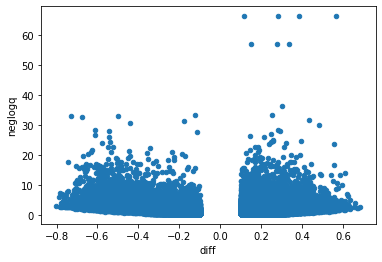

In [2]:
import numpy as np
indf['neglogq']=-np.log10(indf['q'])

indf.plot.scatter(x='diff',y='neglogq')

In [3]:
negloqcut=-np.log10(qcut)
negloqcut

5.0

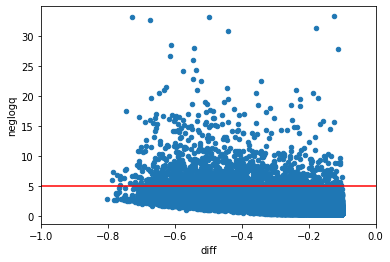

In [4]:
indfhypo=indf[indf['diff']<0]

indfhypo.plot.scatter(x='diff',y='neglogq')
plt.axhline(y=negloqcut, color='r', linestyle='-')
plt.xlim([-1, 0])
plt.show()

In [5]:
indfhypo.shape

(33040, 41)

In [6]:
indf[indf['diff']==indf["diff"].min()]

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),CD4,others,...,CD4-DC,CD4-Eo,CD4-Tr,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta,neglogq
247474,chr2,174601664,174601675,0.001401,-0.80247,2,0.000055,0.000006,0.038167,0.84064,...,-0.928833,-0.933083,-0.667333,-0.629833,-0.928833,-0.893083,-0.915,-0.146,-0.944166,2.853562


In [7]:
qcutdf=indfhypo[indfhypo['q']<=qcut]
qcutdf.head()

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),CD4,others,...,CD4-DC,CD4-Eo,CD4-Tr,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta,neglogq
12,chr1,605447,605518,2.080900e-06,-0.181833,12,5.058200e-13,8.997500e-10,0.11381,0.29564,...,-0.151662,-0.159732,-0.063315,-0.103732,-0.202982,-0.145482,-0.231357,-0.063315,-0.327968,5.681749
249,chr1,1250619,1251417,7.219300e-09,-0.367453,23,4.141100e-14,1.074500e-12,0.13003,0.49748,...,-0.525405,-0.549100,-0.235361,-0.116579,-0.683666,-0.638883,-0.012956,0.017813,-0.683666,8.141505
594,chr1,2115263,2115683,9.953800e-12,-0.224091,20,4.296600e-14,6.220600e-16,0.57457,0.79866,...,-0.297113,-0.301705,-0.020105,0.035395,-0.274055,-0.268655,-0.287497,0.035395,-0.341180,11.002011
620,chr1,2152872,2153391,7.249600e-15,-0.415571,18,4.207700e-14,2.394000e-19,0.38943,0.80500,...,-0.550459,-0.294348,-0.106959,-0.029181,-0.530653,-0.515848,-0.475848,-0.029181,-0.574570,14.139686
668,chr1,2229659,2230869,1.034600e-19,-0.452745,36,4.651800e-14,1.181400e-24,0.10437,0.55712,...,-0.577658,-0.500949,0.017203,0.062453,-0.544755,-0.566047,-0.403806,0.062453,-0.750232,18.985228


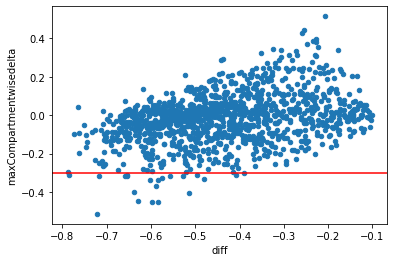

In [8]:
qcutdf.plot.scatter(x='diff',y='maxCompartmentwisedelta')
plt.axhline(y=-0.3, color='r', linestyle='-')
plt.show()

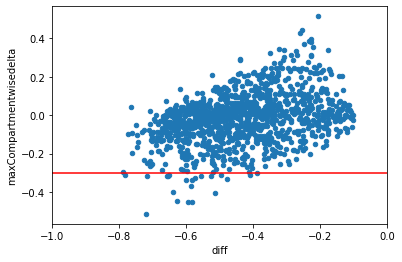

In [9]:
qcutdf.plot.scatter(x='diff',y='maxCompartmentwisedelta')
plt.axhline(y=-0.3, color='r', linestyle='-')
plt.xlim([-1, 0])
plt.show()

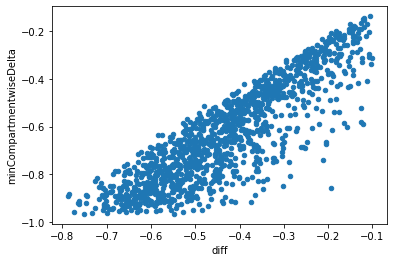

In [10]:
qcutdf.plot.scatter(x='diff',y='minCompartmentwiseDelta')

In [11]:
qcutdf.shape

(1213, 41)